In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from utils import process_data


In [2]:

data, info = process_data('data-agg')

p_grouped = data.groupby('person')
c_grouped = data.groupby('coin')

n_people = p_grouped['N_throws'].sum().count()
n_coin = c_grouped['N_throws'].sum().count()

print(n_coin)
print(n_people)

44
48


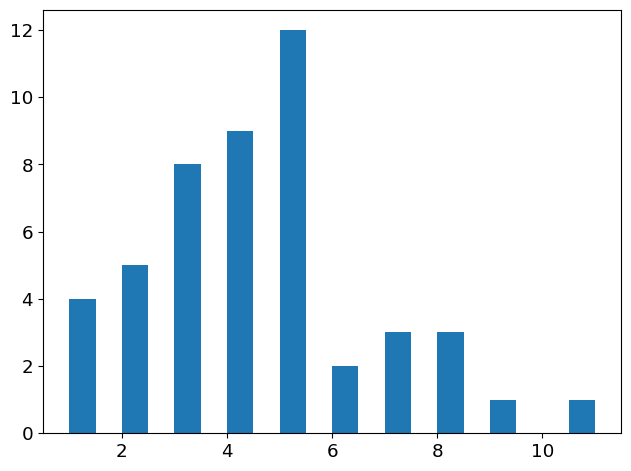

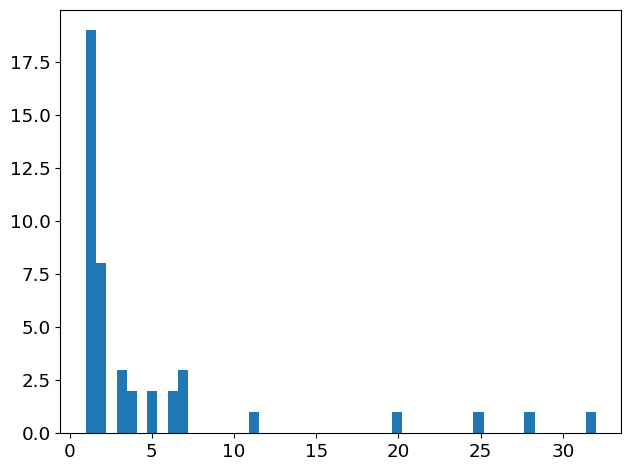

In [3]:

plt.figure()
h = plt.hist(p_grouped['coin'].count(), bins=20)

plt.figure()
h = plt.hist(c_grouped['person'].count(), bins=50)


Text(0.5, 1.0, 'Histogram of c_p_N_throws')

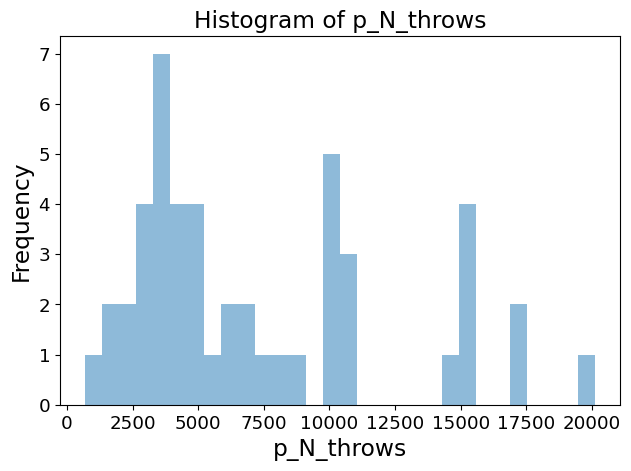

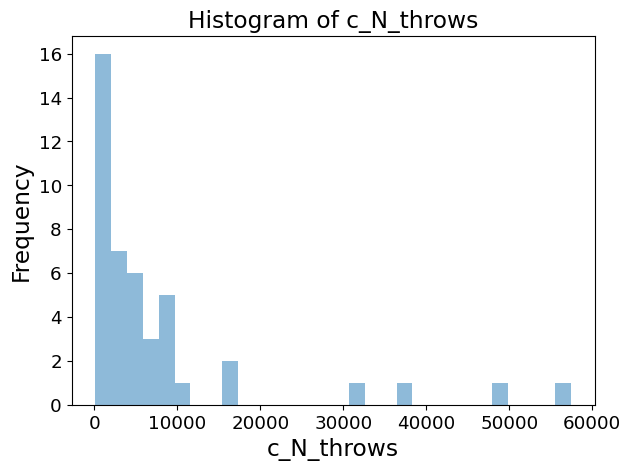

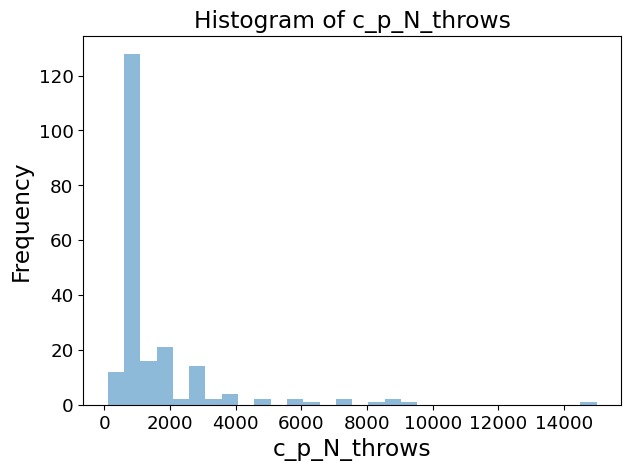

In [4]:
p_N_throws = p_grouped['N_throws'].sum()

plt.figure()
plt.hist(p_N_throws, bins=30, alpha=0.5)
plt.xlabel('p_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of p_N_throws')

c_N_throws = c_grouped['N_throws'].sum()
plt.figure()
plt.hist(c_N_throws, bins=30, alpha=0.5)
plt.xlabel('c_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of c_N_throws')

c_p_N_throws = data.groupby(['coin', 'person'])['N_throws'].sum()
plt.figure()
plt.hist(c_p_N_throws, bins=30, alpha=0.5)
plt.xlabel('c_p_N_throws')
plt.ylabel('Frequency')
plt.title('Histogram of c_p_N_throws')




Text(0.5, 1.0, 'Person success rate with error bars')

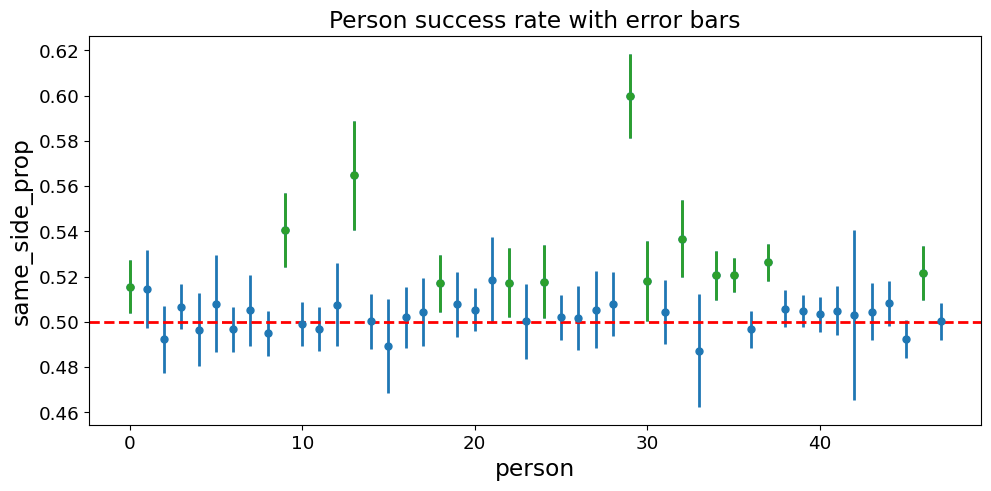

In [5]:
def prop_to_plot( groups ):
    data_g = data.groupby(groups).sum(numeric_only=True)
    h_h, t_t, N_h, N_t = data_g['heads_heads'], data_g['tails_tails'], data_g['N_start_heads_up'], data_g['N_start_tails_up']
    prop = (h_h / N_h + t_t / N_t) / 2
    prop_err = np.sqrt( prop * (1 - prop) / (N_h + N_t) )
    x_axis = np.arange(prop.size)
    plt.errorbar( x_axis, prop, yerr=2*prop_err, fmt='o')
    outliers = np.abs( 0.5 - prop ) > 2*prop_err
    plt.errorbar( x_axis[outliers], prop[outliers], color='tab:green', fmt='o', yerr=2*prop_err[outliers])
    plt.axhline(y=0.5, color='r', linestyle='--')
    return

plt.figure(figsize=(10,5))
prop_to_plot('person')
plt.xlabel('person')
plt.ylabel('same_side_prop')
plt.title('Person success rate with error bars')


Text(0.5, 1.0, 'Coin success rate with error bars')

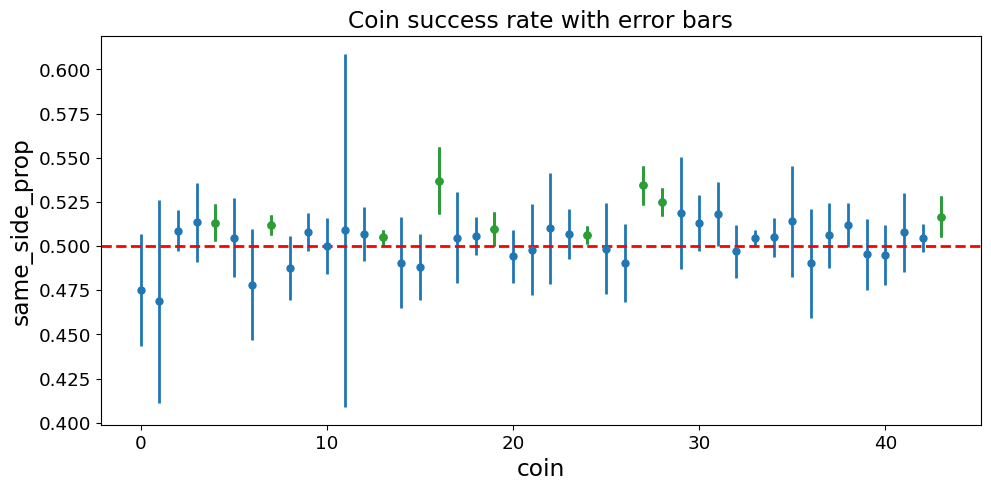

In [6]:
figure = plt.figure(figsize=(10,5))
prop_to_plot( ['coin'] )
plt.xlabel('coin')
plt.ylabel('same_side_prop')
plt.title('Coin success rate with error bars')

Text(0.5, 1.0, 'Person-coin success rate with error bars')

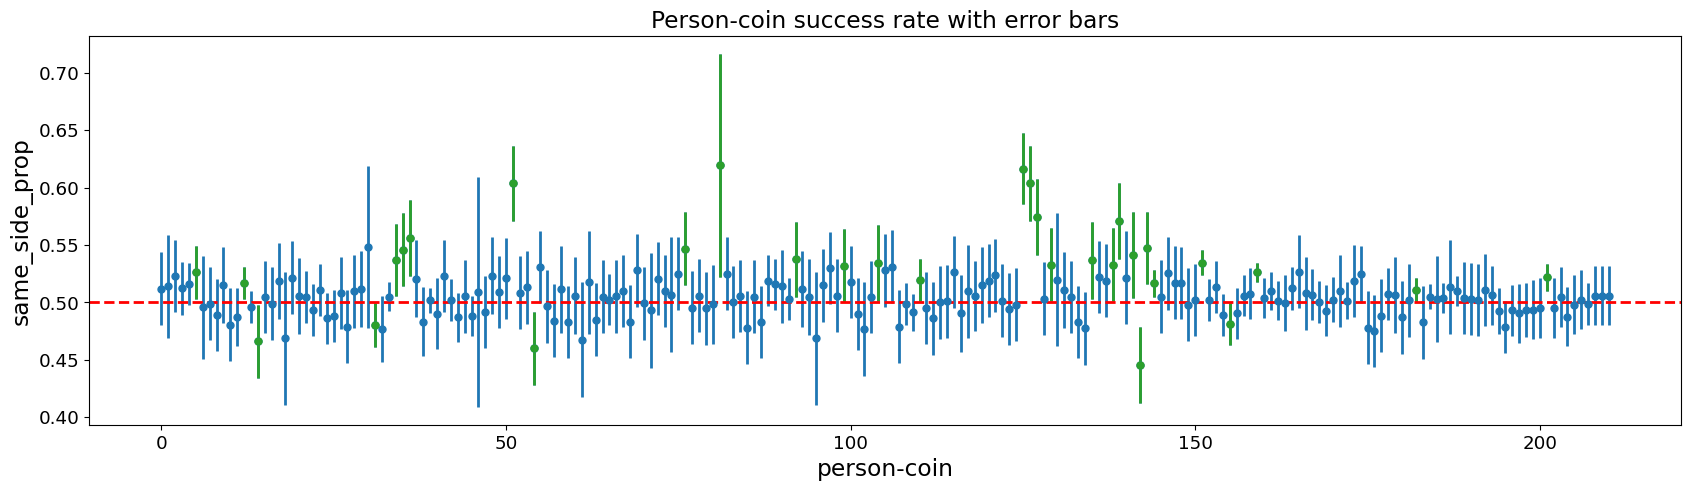

In [7]:

plt.figure(figsize=(17, 5))
prop_to_plot( ['person','coin'] )
plt.xlabel('person-coin')
plt.ylabel('same_side_prop')
plt.title('Person-coin success rate with error bars')


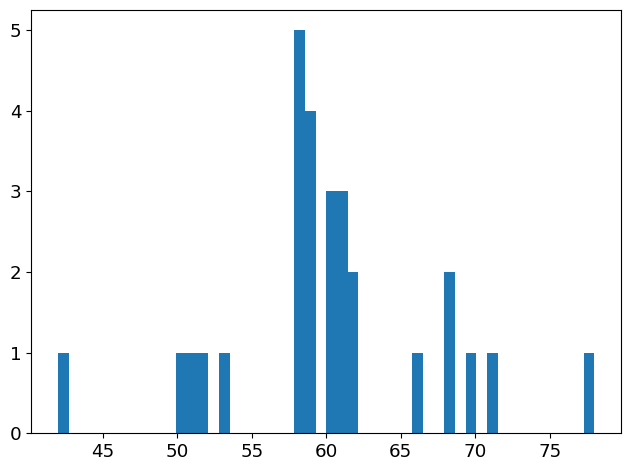

In [10]:
data, info = process_data('df-time-agg', drop_ingeborg=False)
p_grouped = data.groupby('person')

# TianqiPeng, JoycePang
tianqi = p_grouped.get_group('TianqiPeng')

plt.figure()
h = plt.hist(tianqi['same_side'], bins=50)